In [42]:
# Importar librerías a utilizar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# 1.- Importar datos
# Leer el archivo
dataframe = pd.read_excel('medicinas.xlsx')
dataframe = dataframe.drop('Unnamed: 0',axis=1)
print(dataframe.head())
print(dataframe.describe())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    1   2            1   25.355     4
1   47    0   0            1   13.093     2
2   47    0   0            1   10.114     2
3   28    1   1            1    7.798     3
4   61    1   0            1   18.043     4
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.480000    1.065000     0.515000   16.084485    2.870000
std     16.544315    0.500854    0.839224     0.501029    7.223956    1.372047
min     15.000000    0.000000    0.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    0.000000     0.000000   10.445500    2.000000
50%     45.000000    0.000000    1.000000     1.000000   13.936500    3.000000
75%     58.000000    1.000000    2.000000     1.000000   19.380000    4.000000
max     74.000000    1.000000    2.000000     1.000000   38.247000    4.000000


In [23]:
# Separar características (X) y etiquetas (Y)
x = dataframe.iloc[:,:-1]
y = dataframe[['Drug']]

In [24]:
# 2.- Dividir el conjunto de datos (75% entrenamiento, 25% prueba)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [25]:
# 3.- Construiel módelo
# Crear el módelo Árbol de decisión
model = DecisionTreeClassifier()

In [26]:
# 4.- Entrenar el módelo
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
# Determinar las entradas y salidas de x_test
y_pred = model.predict(x_test)

In [43]:
# 5.- Métricas

# Evaluar el módelo (métricas)

# Exactitud
accuracy = accuracy_score(y_test,y_pred)
# Matriz de confusión
matrix = confusion_matrix(y_test,y_pred)

print(f"La exactitud es de: {accuracy}")

La exactitud es de: 1.0


<Axes: >

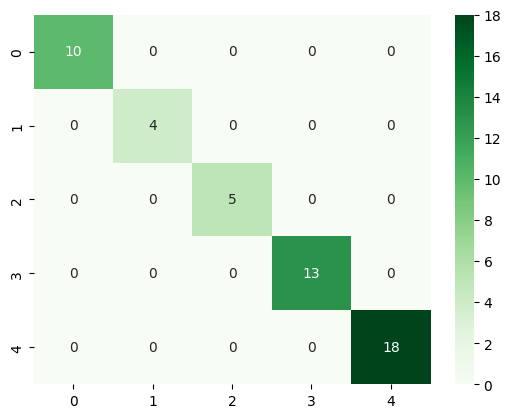

In [68]:
# Gráfica de matriz de confusión
tags = np.unique(y_test)
sns.heatmap(matrix,annot=True,cmap="Greens",xticklabels=tags,yticklabels=tags)

In [57]:
# Predicción con datos nuevos

#   age: edad del paciente
#   sex: genero del paciente principal (0: masculino, 1: femenino)
#	Blood Pressure Levels (BP): niveles de presión arterial (Bajo: 0, Normal: 1, Alto: 2)
#	Cholesterol Levels: nivel de colesterol (Alto:1, Normal:0)
#	Na to Potassium Ration: concentraciones de sodio y potasio en el cuerpo humano
#	Drug: Tipos de medicamentos (0,1,2,3,4)

In [58]:
# Administrar medicamentos para: Hombre, 36 años, con presión arterial alta,
# colesterol normal y concentración de sodio y potasio de 10
administrar_medicamento = model.predict([[36,0,2,0,10]])
print(f'El tipo de medicamento a administrar es el tipo: {administrar_medicamento}')

El tipo de medicamento a administrar es el tipo: [0]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
# Administrar medicamentos para: Mujer, 35 años, con presión arterial normal,
# colesterol normal y concentración de sodio y portasio de 25
administrar_medicamento = model.predict([[35,1,1,0,25]])
print(f'El tipo de medicamento a administrar es el tipo: {administrar_medicamento}')

El tipo de medicamento a administrar es el tipo: [4]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
# Administrar medicamento para: mujer, 75 años, con presión arterial baja,
# colesterol alto y concentración de sodio y potasio de 9
administrar_medicamento = model.predict([[75,1,0,1,9]])
print(f'El tipo de medicamento a administrar es el tipo: {administrar_medicamento}')

El tipo de medicamento a administrar es el tipo: [2]


C:\Users\ricki\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
# Importancia de las características SOLO PARA ÁRBOL DE DECISIÓN
importances = model.feature_importances_
names_columns = dataframe.columns.to_list()

for i,k in zip(importances,names_columns):
    print(f"Importancia de la característica {k}: {i}")

Importancia de la característica Age: 0.12433581296493093
Importancia de la característica Sex: 0.0
Importancia de la característica BP: 0.24269553507066793
Importancia de la característica Cholesterol: 0.126450993215074
Importancia de la característica Na_to_K: 0.5065176587493271


<Axes: xlabel='Na_to_K', ylabel='BP'>

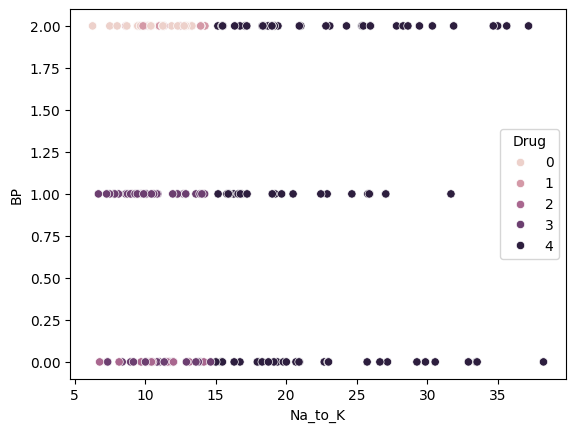

In [69]:
# Gráfico de dispersión
sns.scatterplot(data=dataframe,x="Na_to_K",y="BP",hue="Drug")